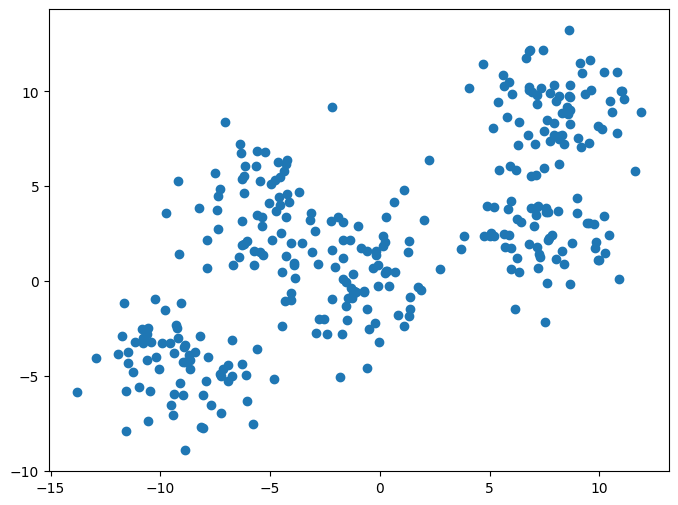

In [30]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

np.random.seed(234)
X, _= make_blobs(n_samples = 330, centers = 5, cluster_std = 1.84)
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [31]:
df = pd.DataFrame(X)
df

,0,1
0,8.774131,2.022255
1,-6.293160,-4.363865
2,-9.220567,-2.457974
3,-4.215713,6.366138
4,-4.507977,2.511681
...,...,...
325,8.145732,6.163484
326,7.670788,3.661790
327,8.284814,7.672901
328,7.155862,3.907463


# Euclid K-Means

In [32]:
def centroids_init(df, n):
  return df.sample(n).to_numpy()

In [33]:
def euclid_dis(data_point, centroids):
  return np.sum(np.square(data_point - centroids))

In [38]:
def cluster_assign(data, centroids):
  nearest_centroids = []
  nearest_error = []
  data = data.to_numpy()
  for record in data:
    dis_to_centroids = [euclid_dis(record, point) for point in centroids]
    min_dis = np.min(dis_to_centroids)
    nearest_centroids.append( np.where(dis_to_centroids == min_dis)[0][0] )
    nearest_error.append(min_dis)
  return np.array(nearest_centroids), np.array(nearest_error)

In [35]:
def def_new_centroids(cluster):
  cluster = cluster.to_numpy()
  return 1/len(cluster) * np.sum(cluster, axis = 0)

In [41]:
def k_means(df, k):
  centroids = centroids_init(df, k)
  of_centroid, error = cluster_assign(df, centroids)
  while True:
    centroids = np.array([def_new_centroids(df[of_centroid == cluster_num]) for cluster_num in range(k)])
    old_of_centroid = of_centroid.copy()
    of_centroid, error = cluster_assign(df, centroids)
    if np.array_equal(old_of_centroid, of_centroid):
      break
  return centroids, of_centroid, np.sum(error)

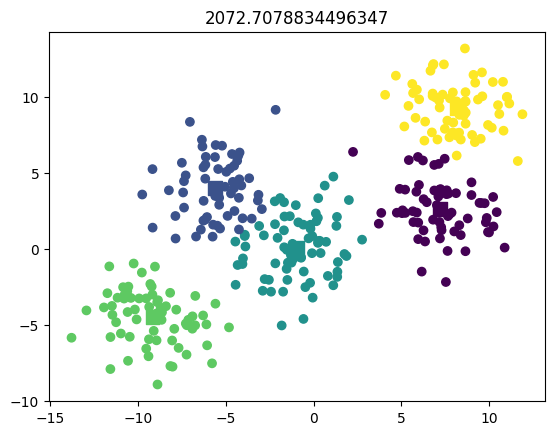

In [56]:
cluster_num = 5
centroids, cluster, sum_error = k_means(df, cluster_num)
plt.scatter(df[0], df[1], c = cluster)
plt.scatter(centroids[:,0], centroids[:,1], c = np.arange(cluster_num), marker = 's', s = 100)
plt.title(sum_error)
plt.show()

# K-Median

In [57]:
def centroids_init(df, n):
  return df.sample(n).to_numpy()

In [58]:
def manhattan_dis(data_point, centroids):
  return np.sum(np.abs(data_point - centroids))

In [59]:
def med_cluster_assign(data, centroids):
  nearest_centroids = []
  nearest_error = []
  data = data.to_numpy()
  for record in data:
    dis_to_centroids = [manhattan_dis(record, point) for point in centroids]
    min_dis = np.min(dis_to_centroids)
    nearest_centroids.append( np.where(dis_to_centroids == min_dis)[0][0] )
    nearest_error.append(min_dis)
  return np.array(nearest_centroids), np.array(nearest_error)

In [60]:
def med_new_centroids(cluster):
  cluster = cluster.to_numpy()
  sorted = np.sort(cluster, axis = 0)
  if len(sorted) % 2 != 0:
    return sorted[int((len(sorted) + 1)/2) - 1, :]
  else:
    return (sorted[int(len(sorted)/2) - 1, :] + sorted[int(len(sorted)/2 + 1) - 1, :]) / 2

In [61]:
def k_median(df, k):
  centroids = centroids_init(df, k)
  of_centroid, error = med_cluster_assign(df, centroids)
  while True:
    centroids = np.array([med_new_centroids(df[of_centroid == cluster_num]) for cluster_num in range(k)])
    old_of_centroid = of_centroid.copy()
    of_centroid, error = med_cluster_assign(df, centroids)
    if np.array_equal(old_of_centroid, of_centroid):
      break
  return centroids, of_centroid, np.sum(error)

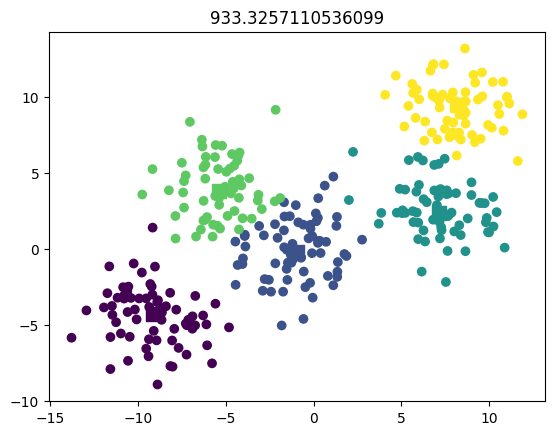

In [72]:
cluster_num = 5
centroids, cluster, sum_error = k_median(df, cluster_num)
plt.scatter(df[0], df[1], c = cluster)
plt.scatter(centroids[:,0], centroids[:,1], c = np.arange(cluster_num), marker = 's', s = 100)
plt.title(sum_error)
plt.show()

# Mahalanobis K-Means

In [63]:
def centroids_init(df, n):
    return df.sample(n).to_numpy()

In [64]:
def euclid_dis(data_point, centroids):
    return np.sum(np.square(data_point - centroids))

In [66]:
def maha_dis(a, b, cov):
    return np.sqrt(np.dot(np.dot((a - b), np.linalg.inv(cov)),np.transpose(a - b)))

In [67]:
def def_new_centroids(cluster):
    cluster = cluster.to_numpy()
    return np.mean(cluster, axis = 0)

In [68]:
def init_assign(data, centroids):
    nearest_centroids = []
    nearest_error = []
    data = data.to_numpy()
    for record in data:
        dis_to_centroids = [euclid_dis(record, point) for point in centroids]
        min_dis = np.min(dis_to_centroids)
        nearest_centroids.append( np.where(dis_to_centroids == min_dis)[0][0] )
        nearest_error.append(min_dis)
    return np.array(nearest_centroids), np.array(nearest_error)

In [69]:
def cluster_assign(df, centroids, of_centroid):
    nearest_centroids = []
    nearest_error = []
    cov = [np.cov(df[of_centroid == cluster_num], rowvar = False) for cluster_num in range(len(centroids))]
    data = df.to_numpy()
    for record in data:
        dis_to_centroids = [maha_dis(record, point, cov) for point in centroids]
        min_dis = np.min(dis_to_centroids)
        nearest_centroids.append( np.where(dis_to_centroids == min_dis)[0][0] )
        nearest_error.append(min_dis)
    return np.array(nearest_centroids), np.array(nearest_error)

In [70]:
def maha_kmeans(df, k):
    centroids = centroids_init(df, k)
    of_centroid, error = init_assign(df, centroids)
    while True:
        centroids = np.array([def_new_centroids(df[of_centroid == cluster_num]) for cluster_num in range(k)])
        old_of_centroid = of_centroid.copy()
        of_centroid, error = cluster_assign(df, centroids, of_centroid)
        if np.array_equal(old_of_centroid, of_centroid):
            break
    return centroids, of_centroid, np.sum(error)

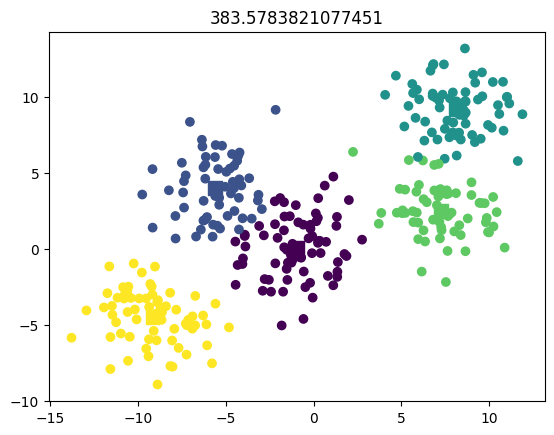

In [76]:
cluster_num = 5
centroids, cluster, sum_error = maha_kmeans(df, cluster_num)
plt.scatter(df[0], df[1], c = cluster)
plt.scatter(centroids[:,0], centroids[:,1], c = np.arange(cluster_num), marker = 's', s = 100)
plt.title(sum_error)
plt.show()